In [1]:
import pylab
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
%matplotlib inline

# 团问题（clique problem）

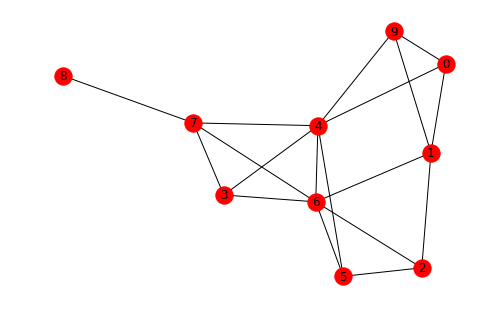

In [2]:
# 生成一个随机图
G = nx.erdos_renyi_graph(10, 0.3, seed=1)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels=True)

## 团函数

**参考链接：**https://networkx.github.io/documentation/stable/reference/algorithms/clique.html

1. 所有团: nx.enumerate_all_cliques(G)

2. 极大团: nx.find_cliques(G)

3. 极大团数: nx.graph_number_of_cliques(G,cliques=None)  #cliques——团list，可以指定

4. 最大团的大小: nx.graph_clique_number(G, cliques=None)

5. 每个顶点对应的团: nx.cliques_containing_node(G, nodes=None, cliques=None)

### 输出所有团

In [3]:
#所有团
clique_all = nx.enumerate_all_cliques(G)
print('所有团：')
n=0
for i in clique_all:
    print(i)
    n=n+1
print('所有团数：',n)

所有团：
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 1]
[0, 4]
[0, 9]
[1, 2]
[1, 6]
[1, 9]
[2, 5]
[2, 6]
[3, 4]
[3, 6]
[3, 7]
[4, 5]
[4, 6]
[4, 7]
[4, 9]
[5, 6]
[6, 7]
[7, 8]
[0, 1, 9]
[0, 4, 9]
[1, 2, 6]
[2, 5, 6]
[3, 4, 6]
[3, 4, 7]
[3, 6, 7]
[4, 5, 6]
[4, 6, 7]
[3, 4, 6, 7]
所有团数： 38


### 输出极大团

In [4]:
#极大团——maximal clique
clique_max = nx.find_cliques(G)
print('极大团：')
for i in clique_max:
    print(i)

极大团：
[8, 7]
[1, 0, 9]
[1, 2, 6]
[2, 5, 6]
[4, 0, 9]
[4, 6, 3, 7]
[4, 6, 5]


### 输出极大团数

In [5]:
#极大团数
num_max=nx.graph_number_of_cliques(G)
print( '极大团数：',num_max)

极大团数： 7


### 输出最大团规模

In [6]:
#最大团的size——the size of the largest clique in the graph.
size_of_largest=nx.graph_clique_number(G)
print( '最大团的size：',size_of_largest)

最大团的size： 4


### 输出最大团

In [7]:
#最大团
size_of_largest=nx.graph_clique_number(G)
clique_max = nx.find_cliques(G)
print('最大团：')
for i in clique_max:
    if len(i)== size_of_largest:
        print(i)

最大团：
[4, 6, 3, 7]


### 输出每个节点对应的团

In [8]:
#每个Node对应的团——Returns a list of cliques containing the given node.
nx.cliques_containing_node(G)#, nodes=[0,1])

{0: [[1, 0, 9], [4, 0, 9]],
 1: [[1, 0, 9], [1, 2, 6]],
 2: [[1, 2, 6], [2, 5, 6]],
 3: [[4, 6, 3, 7]],
 4: [[4, 0, 9], [4, 6, 3, 7], [4, 6, 5]],
 5: [[2, 5, 6], [4, 6, 5]],
 6: [[1, 2, 6], [2, 5, 6], [4, 6, 3, 7], [4, 6, 5]],
 7: [[8, 7], [4, 6, 3, 7]],
 8: [[8, 7]],
 9: [[1, 0, 9], [4, 0, 9]]}

## 具有社团结构的网络

1. 对于一个图G而言，如果其中有一个完全子图（任意两个节点之间均存在边），节点数是k，那么这个完全子图就可称为一个k-clique;

2. 如果两个k-clique之间存在k-1个共同的节点，那么就称这两个clique是“相邻”的。彼此相邻的这样一串clique构成最大集合，就可以称为一个社区，且社区是可以重叠的。

3. 函数: k_clique_communities(G, k, cliques=None)  # k -- size of smallest clique

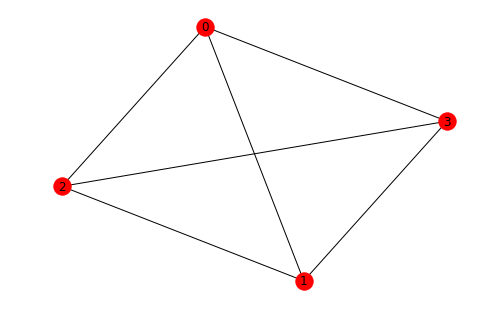

In [9]:
#构建网络
G = nx.complete_graph(4) #返回具有N个节点的完整图，节点标签是0~n-1
nx.draw(G, with_labels = True)
plt.show()

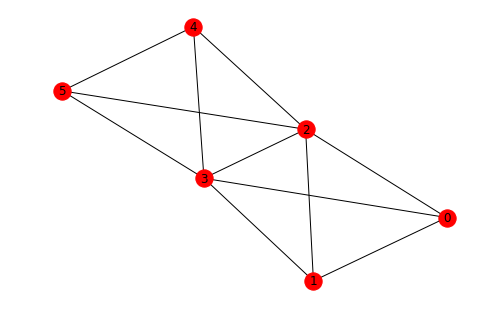

In [10]:
#添加边
K5 = nx.convert_node_labels_to_integers(G,first_label=2)
#G为复杂网络图，指定编号节点中的起始偏移量，新的整数标签编号为first_label，...，n-1 + first_label。
G.add_edges_from(K5.edges())#对地图中添加边
nx.draw(G, with_labels = True)
plt.show()

In [11]:
c = list(k_clique_communities(G, 4))#查找具有社团结构的网络：地图，最小团块大小 ：完全连接K个节点的子图
print(c)

[frozenset({0, 1, 2, 3}), frozenset({2, 3, 4, 5})]


# 群组发现算法（Community Detection）

## 示例数据集 - Zachary’s Karate Club

Zachary's Karate Club是一个描述大学空手道俱乐部成员社交关系的网络，由Wayne W. Zachary在论文《An Information Flow Model for Conflict and Fission in Small Groups》中提出，是一个常用的社交网络示例。这个空手道俱乐部包含34名成员，管理员 John A 和教官 Mr. Hi 之间的一次冲突导致这个俱乐部一分为二，一半的成员围绕着 Mr. Hi 成立了一个新俱乐部，另一半成员要么找到了新的教练，要么放弃了空手道。因此，在对应的社交网络中，节点也被划分为两个组，一组属于Mr. Hi (Instructor) ，另一组属于John A (Administrator)，其中节点0代表Mr. Hi，节点33代表John A。

In [12]:
from collections import defaultdict
from matplotlib import cm

In [13]:
# 导入数据集
kcg = nx.karate_club_graph()

pos = nx.spring_layout(kcg)

# 节点所属 community 的 ground truth
gt_dict = nx.get_node_attributes(kcg, 'club')
gt = [gt_dict[i] for i in kcg.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

# 获取节点度信息用于可视化
d = dict(nx.degree(kcg))

# graph 基本信息
print(nx.info(kcg))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [14]:
def draw_communities(Graph, membership, pos, d):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    size_dict = defaultdict(list)
    club_dict = defaultdict(list)
    for stu, club in enumerate(membership):
        club_dict[club].append(stu)
        size_dict[club].append(d[stu]*200)
    
    color_dict = {0: 'red',
                  1: 'green'}
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(Graph, pos,
                               nodelist=members,
                               # node_color=cm.jet(norm(club)),
                               node_color=color_dict[club],
                               node_size=size_dict[club],
                               alpha=0.8,
                               )
    plt.title("Zachary's Karate Club - Communities", fontsize=16)
    nx.draw_networkx_edges(Graph, pos, alpha=0.5)
    nx.draw_networkx_labels(Graph, pos)

In [15]:
y_true = gt

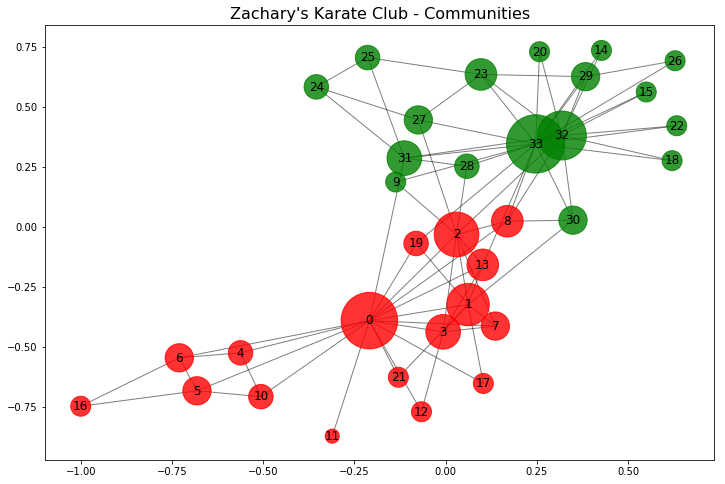

In [16]:
draw_communities(kcg, y_true, pos, d)

## 谱聚类（Spectral Clustering）

- **sklearn.cluster.SpectralClustering**
- **参考文档：**https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
- *其他聚类方法：KMeans clustering, Agglomerative clustering, affinity propagation

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
# 获取图的邻接矩阵
adj_mat = nx.adj_matrix(kcg).todense()

# 进行谱聚类
spectral = SpectralClustering(n_clusters=2, affinity="precomputed", n_init=200)
spectral.fit(adj_mat)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_init=200, n_jobs=None,
                   n_neighbors=10, random_state=None)

In [19]:
# 比较谱聚类与真实社区划分的区别

print("spectral.labels: {}".format(spectral.labels_))

# print("invert labels...")
# y_pred = np.abs(spectral.labels_ - 1)
y_pred = spectral.labels_
print("y_pred: {}".format(y_pred))
print("y_true: {}".format(y_true))

spectral.labels: [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
y_pred: [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
y_true: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5,1,'Comparing spectral clustering result with original communities')

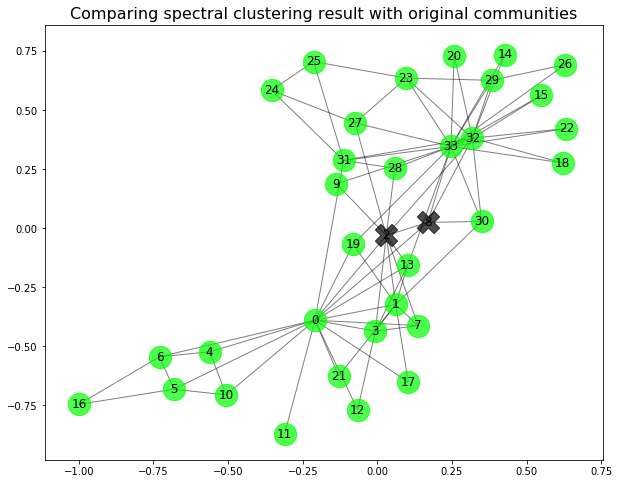

In [20]:
def draw_true_vs_pred(G, y_true, y_pred, pos, algo_name, ax):
    
    for student, club in enumerate(y_true):
        if y_pred is not None:
            if club == y_pred[student]:
                node_color = [0, 1, 0]
                node_shape = 'o'
            else:
                node_color = [0, 0, 0]
                node_shape = 'X'
                
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[student],
                               node_color=node_color,
                               node_size=500,
                               alpha=0.7,
                               ax=ax,
                               node_shape=node_shape)
    
    # Draw edges and show final plot
    ax.set_title(algo_name)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos)


fig, ax = plt.subplots(figsize=(10, 8))

draw_true_vs_pred(kcg, y_true, y_pred, pos, spectral, ax)

plt.title("Comparing spectral clustering result with original communities", fontsize=16)

## Louvain算法

- **使用Louvain启发式算法计算图节点的社区分类，以最大化 modularity**
- **需安装第三方库：community, python-louvain**
- **使用方法：community.best_partition(Graph)**
- **参考文档：**
    1. https://github.com/taynaud/python-louvain
    2. https://python-louvain.readthedocs.io/en/latest/api.html

In [21]:
import community as community_louvain

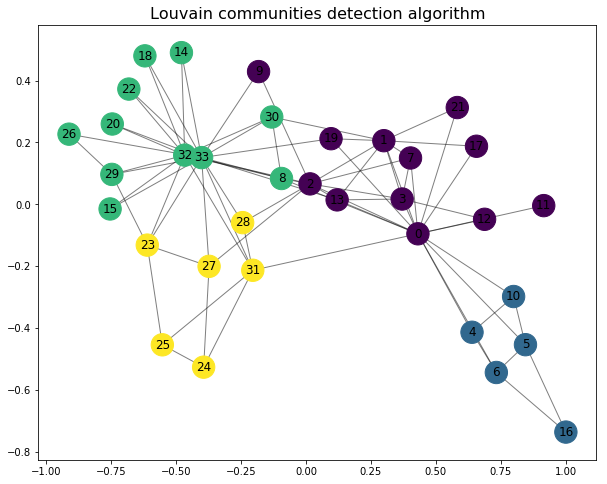

In [22]:
plt.subplots(figsize=(10, 8))

# compute the best partition
partition = community_louvain.best_partition(kcg)

# draw the graph
pos = nx.spring_layout(kcg)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

nx.draw_networkx_nodes(kcg, pos, partition.keys(), node_size=500,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(kcg, pos, alpha=0.5)

nx.draw_networkx_labels(kcg, pos)

plt.title("Louvain communities detection algorithm", fontsize=16)
plt.show()

## Girvan-Newman算法

- **使用方法：girvan_newman(Graph, most_valuable_edge=None)**
- **参考文档：**https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html

In [23]:
from networkx.algorithms.community import girvan_newman

In [24]:
# 使用 Girvan-Newman算法进行社区划分
print("Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)")

communities_generator = girvan_newman(kcg)

i = 0
for c in next(communities_generator):
    i += 1    
    print("Community {}: {}, node num: {}".format(i, c, len(c)))

Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)
Community 1: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, node num: 15
Community 2: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, node num: 19


In [25]:
community1 = [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
community2 = [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

y_pred_GN = []
for i in range(34):
    if i in community1:
        y_pred_GN.append(0)
    else:
        y_pred_GN.append(1)

y_pred_GN = np.array(y_pred_GN)

In [26]:
print("y_pred_GN: {}".format(y_pred_GN))
print("y_true: {}".format(y_true))

y_pred_GN: [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
y_true: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5,1,'Comparing Girvan Newman result with original communities')

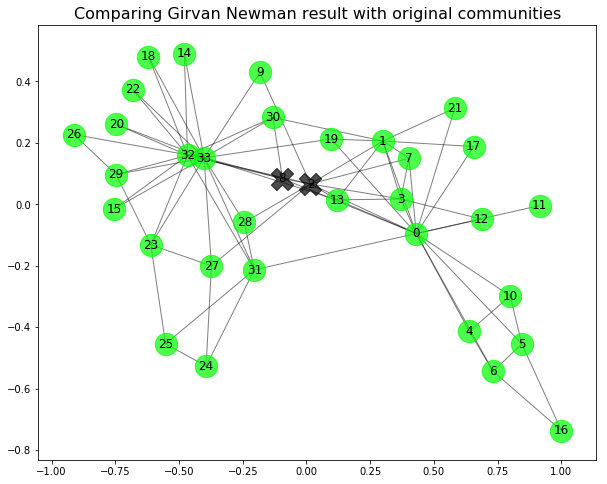

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))

draw_true_vs_pred(kcg, y_true, y_pred_GN, pos, spectral, ax)

plt.title("Comparing Girvan Newman result with original communities", fontsize=16)